- Perceptron

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [ ]:
iris = load_iris()
X = iris.data[:,(2,3)] # 꽃잎의 길이와 너비
y = (iris.target == 0).astype(np.int) # 부채붓꽃(Iris Setosa) 인가?

In [ ]:
per_clf = Perceptron()
per_clf.fit(X,y)

Perceptron()

In [ ]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


### 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기

- 케라스를 사용하여 데이터셋 적재하기

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
# 위의 데이터셋은 이미 훈련 세트와 테스트 세트로 나뉘어져 있으나 검증세트는 없다.
# 아래에서 검증세트를 만들고 0~255.0의 스케일을 0~1의 스케일로 조정한다.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

- 시퀀셜 API를 사용하여 모델 만들기

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
# 층을 하나씩 추가하지 않고 Sequential 모델을 만들 때 층의 리스트를 전달할 수 있다.
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28,28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('dense') is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.01054376, -0.02635753, -0.07215436, ...,  0.00225594,
         0.01692097,  0.03990839],
       [ 0.00349125, -0.06284371,  0.07023272, ...,  0.03769381,
         0.00291247,  0.05130871],
       [ 0.020326  ,  0.01285742, -0.0126001 , ...,  0.01582488,
         0.00930792,  0.01555906],
       ...,
       [ 0.03878266, -0.05027844,  0.00557458, ...,  0.01503299,
         0.06688713, -0.06926   ],
       [ 0.07274784,  0.05110222, -0.04165059, ..., -0.05206147,
         0.07100753,  0.06480286],
       [-0.00035334,  0.01216184,  0.05392459, ...,  0.00673158,
         0.03351892, -0.01072757]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 14s 255us/sample - loss: 0.7277 - accuracy: 0.7581 - val_loss: 0.5171 - val_accuracy: 0.8232
Epoch 2/30
55000/55000 [==============================] - 11s 196us/sample - loss: 0.4959 - accuracy: 0.8253 - val_loss: 0.4549 - val_accuracy: 0.8496
Epoch 3/30
55000/55000 [==============================] - 11s 207us/sample - loss: 0.4508 - accuracy: 0.8412 - val_loss: 0.4276 - val_accuracy: 0.8540
Epoch 4/30
55000/55000 [==============================] - 10s 186us/sample - loss: 0.4235 - accuracy: 0.8504 - val_loss: 0.4304 - val_accuracy: 0.8526
Epoch 5/30
55000/55000 [==============================] - 10s 182us/sample - loss: 0.4018 - accuracy: 0.8591 - val_loss: 0.3824 - val_accuracy: 0.8688
Epoch 6/30
55000/55000 [==============================] - 10s 185us/sample - loss: 0.3857 - accuracy: 0.8638 - val_loss: 0.3703 - val_accuracy: 0.8736
Epoch 7/30
55000/55000 [=====================

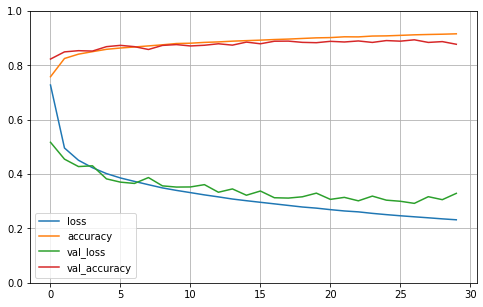

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# 테스트 세트로 모델 평가
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3636309410631657, 0.8671]

- 모델을 사용해 예측을 만들기

In [ ]:
X_new = X_test[:3] # 여기서는 실제로 새로운 샘플이 없기 때문에 테스트 세트의 앞부분을 사용한다.

In [ ]:
y_proba = model.predict(X_new)

In [ ]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([keras.layers.Dense(30,activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]  # 새로운 샘플이라고 생각합니다.
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 230us/sample - loss: 0.8576 - val_loss: 1.2332
Epoch 2/20
11610/11610 [==============================] - 1s 103us/sample - loss: 1.5553 - val_loss: 6.3372
Epoch 3/20
11610/11610 [==============================] - 1s 101us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 1s 113us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 2s 147us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 1s 112us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 1s 120us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 2s 152us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 2s 161us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/116

In [ ]:
y_pred

array([[nan],
       [nan],
       [nan]], dtype=float32)

### 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

In [ ]:
# 와이드 & 딥 신경망 만들기
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [ ]:
# 5개의 특성은 짧은 경로로 보내고 6개의 특성은 깊은 경로로 보내는 신경망
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
# X_train을 전달할 때 (X_train_A, X_train_B) 와 같이 항상 튜플로 전달해야 한다.
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 211us/sample - loss: 2.6632 - val_loss: 1.1935
Epoch 2/20
11610/11610 [==============================] - 1s 124us/sample - loss: 0.8966 - val_loss: 0.7558
Epoch 3/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.7000 - val_loss: 0.6723
Epoch 4/20
11610/11610 [==============================] - 1s 105us/sample - loss: 0.6447 - val_loss: 0.6437
Epoch 5/20
11610/11610 [==============================] - 1s 128us/sample - loss: 0.6201 - val_loss: 0.6260
Epoch 6/20
11610/11610 [==============================] - 2s 138us/sample - loss: 0.6035 - val_loss: 0.6110
Epoch 7/20
11610/11610 [==============================] - 1s 110us/sample - loss: 0.5909 - val_loss: 0.5974
Epoch 8/20
11610/11610 [==============================] - 2s 138us/sample - loss: 0.5784 - val_loss: 0.5857
Epoch 9/20
11610/11610 [==============================] - 1s 110us/sample - loss: 0.566

In [ ]:
# 여러개의 출력 다루기
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat) # 출력층까지는 이전과 동일
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [ ]:
# 각 출력은 각자의 손실 함수가 필요(하나의 손실을 전달하면 케라스가 모든 출력의 손실 함수가 동일하다고 가정함)
# 각 출력은 훈련에 사용되는데 이 때 각 출력에 가중치를 부여할 수 있음
model.compile(loss=["mse","mse"], loss_weights=[0.9,0.1], optimizer="sgd")

In [ ]:
# 각 출력에 대한 레이블을 제공
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 258us/sample - loss: 1.0984 - main_output_loss: 0.9847 - aux_output_loss: 2.1302 - val_loss: 2.1974 - val_main_output_loss: 2.2713 - val_aux_output_loss: 1.5233
Epoch 2/20
11610/11610 [==============================] - 1s 120us/sample - loss: 1.9715 - main_output_loss: 2.0649 - aux_output_loss: 1.1228 - val_loss: 0.5451 - val_main_output_loss: 0.4878 - val_aux_output_loss: 1.0596
Epoch 3/20
11610/11610 [==============================] - 1s 121us/sample - loss: 0.5493 - main_output_loss: 0.5032 - aux_output_loss: 0.9656 - val_loss: 0.4824 - val_main_output_loss: 0.4302 - val_aux_output_loss: 0.9516
Epoch 4/20
11610/11610 [==============================] - 1s 121us/sample - loss: 0.4664 - main_output_loss: 0.4220 - aux_output_loss: 0.8653 - val_loss: 0.4650 - val_main_output_loss: 0.4225 - val_aux_output_loss: 0.8467
Epoch 5/20
11610/11610 [==============================] - 1s 12

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B],[y_test,y_test])
# print("total_loss : %.4f, main_loss : %.4f, aux_loss : %.4f"%(total_loss, main_loss, aux_loss))

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [ ]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

### 10.2.5 서브클래싱 API로 동적 모델 만들기

In [63]:
# 높은 유연성이 필요하다면 서브클래싱 API로 구성하면 좋다.
class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs) ## 표준매개변수를 처리합니다 (예를 들면, name)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat - keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel()

### 10.2.6 모델 저장과 복원

In [64]:
# model = keras.models.Sequential([...])
# model.compile([...])
# model.fit([...])
# model.save("my_keras_model.h5")

In [65]:
# model = keras.models.load_model("my_keras_model.h5")

### 10.2.7 콜백 사용하기

In [ ]:
# fit()매서드의 callback 매개변수를 사용하여 케라스가 훈련의 사작이나 끝에 호출할 객체 리스트를 지정할 수 있다.